<a href="https://colab.research.google.com/github/Arshiya109/Fundamentals-of-Deep-Learning/blob/main/CNN_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convulation Neural Network**


### What is Convulation Neural Network (CNNs) ?

A Convolutional Neural Network (CNN) represents a sophisticated form of deep learning model primarily employed for tasks such as image recognition. Its core functionality revolves around learning to identify intricate patterns within images by employing specialized layers known as convolutional layers. These layers utilize filters to systematically analyze the input image, detecting essential features like edges, textures, and shapes.

As data progresses through successive layers, the CNN becomes adept at discerning increasingly complex patterns. Additionally, CNN architectures incorporate pooling layers, which serve to condense the data dimensionality, enhancing computational efficiency. Ultimately, fully connected layers situated towards the network's end utilize the acquired features to classify images into predefined categories.

CNNs are prized for their ability to autonomously and dynamically acquire spatial hierarchies of features from input images, making them exceptionally potent for a variety of visual recognition tasks

## 1. Importing the Libraries

First, we'll import the necessary PyTorch and other libraries



In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


## 2. Loading and Preprocessing Data

Next, we are going to load and preprocess the CIFAR-10 dataset with data augmentation to improve model generalization.

Files already downloaded and verified
Files already downloaded and verified
Sample images with labels:
  car  frog   car   dog


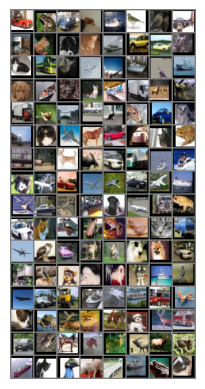

In [12]:
# Define transformation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download and load training data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

# Download and load test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

# Define classes in CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Print and show image samples
print("Sample images with labels:")
for batch_idx, (images, labels) in enumerate(trainloader):
    if batch_idx < 1:  # Print samples only from the first batch
        print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
        imshow(torchvision.utils.make_grid(images))

## 3. Defining the CNN Model

We define a deeper and more complex CNN model, and include printing the shape to ensure it matches.

In [13]:
class AdvancedCNN(nn.Module):
    def __init__(self):
        super(AdvancedCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.25))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25))
        self.fc1 = nn.Linear(128 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc3(x)
        return x

net = AdvancedCNN()


## 4. Defining the Loss Function and Optimizer
We specify the loss function and use the Adam optimizer.

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
print(criterion)
print(optimizer)


CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## 5. Training the Model

We training the model on the training data.

In [ ]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 100, Loss: 1.994
Epoch 1, Batch 200, Loss: 1.723
Epoch 1, Batch 300, Loss: 1.627
Epoch 2, Batch 100, Loss: 1.502
Epoch 2, Batch 200, Loss: 1.459
Epoch 2, Batch 300, Loss: 1.429
Epoch 3, Batch 100, Loss: 1.373
Epoch 3, Batch 200, Loss: 1.351
Epoch 3, Batch 300, Loss: 1.320
Epoch 4, Batch 100, Loss: 1.301
Epoch 4, Batch 200, Loss: 1.277
Epoch 4, Batch 300, Loss: 1.294
Epoch 5, Batch 100, Loss: 1.245
Epoch 5, Batch 200, Loss: 1.213
Epoch 5, Batch 300, Loss: 1.238
Epoch 6, Batch 100, Loss: 1.199
Epoch 6, Batch 200, Loss: 1.177
Epoch 6, Batch 300, Loss: 1.172
Epoch 7, Batch 100, Loss: 1.152
Epoch 7, Batch 200, Loss: 1.156
Epoch 7, Batch 300, Loss: 1.150
Epoch 8, Batch 100, Loss: 1.125
Epoch 8, Batch 200, Loss: 1.100
Epoch 8, Batch 300, Loss: 1.105
Epoch 9, Batch 100, Loss: 1.073
Epoch 9, Batch 200, Loss: 1.085
Epoch 9, Batch 300, Loss: 1.076
Epoch 10, Batch 100, Loss: 1.052
Epoch 10, Batch 200, Loss: 1.057
Epoch 10, Batch 300, Loss: 1.082
Epoch 11, Batch 100, Loss: 1.051
Epoc

## 6. Evaluating the Model
We evaluate the model on the test data.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 67.77%


## CONCLUSION:

This advanced CNN model includes several features that improve its performance and accuracy. Firstly, it uses data augmentation techniques, such as random horizontal flipping and random cropping, which help the model generalize better to new data. The model itself is deeper, with more convolutional layers that increase its complexity and allow it to learn more intricate patterns from the data. Batch normalization is used to stabilize the learning process, making the training more efficient and effective.

Additionally, dropout layers are included to regularize the model and prevent overfitting by randomly deactivating certain neurons during training. Finally, the Adam optimizer is employed, which is an advanced optimization algorithm known for its efficiency and good performance in training deep learning models. These combined features make this CNN model more robust and capable of achieving higher accuracy compared to simpler models.